In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#матрицы переходов и эмиссий
k = 6 #количество возможных наблюдаемых состояний
m = int(2) #количество скрытых состояний

pi = np.array([(k-m)/k, m/k])
h = float(1 / k)
states = [0, 1]

T = np.array([[0.95, 0.05], [0.1, 0.9]], float)
E = np.array([[h, h, h, h, h, h], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]], float)

L = int(300) #длина генерируемой цепочки

In [3]:
def init(k, m):
    if 0 <= np.random.random() < pi[0]:
        H = states[0] #честно
    else:
        H = states[1] #нечестно
    return H

In [4]:
#При заданных параметрех системы используем случайный генератор СММ для того, 
#чтобы получить последовательность наблдаемых величин x длины L и соответствующую ей цепочку скрытых состояний.
def HMM(E, T, L):
    observed = np.array([], dtype=np.int)
    hidden = np.array([], dtype=np.int)
    
    H = init(k, m)
    
    for i in range(L):
        X = np.random.random()
        K = np.random.random()
        
        if (H == 0) and (X < T[0,1]):
            H = 1            
        elif (H == 1) and (X < T[1,0]):
            H = 0
            
        if H == 0:
            hidden = np.append(hidden, [0])
            observed = np.append(observed, [np.random.randint(1, 6)])
        elif H == 1:
            hidden = np.append(hidden, [1])            
            if K < 0.5:
                observed = np.append(observed, [6])                
            else:
                observed = np.append(observed, [np.random.randint(1, 5)])
    return(observed, hidden)

In [5]:
observed, hidden = HMM(E, T, L)

#наблюдение:
print(observed)

#состояние:
print(hidden)

[3 5 2 5 2 4 2 4 1 3 4 5 4 4 3 3 4 6 6 3 1 4 3 3 2 5 3 3 4 2 5 2 1 5 1 3 1
 2 2 1 5 3 3 3 5 3 1 2 3 3 4 2 1 3 4 4 2 3 3 6 6 6 3 3 4 6 4 6 6 1 1 2 3 1
 1 1 2 3 3 2 4 2 5 5 5 4 1 3 2 2 3 4 1 3 5 4 1 6 6 2 6 6 1 1 4 2 1 1 2 1 1
 2 3 1 1 5 1 5 1 4 3 5 4 1 3 4 4 3 2 5 3 4 3 3 1 3 1 4 5 2 1 6 6 5 3 5 2 6
 6 4 3 3 5 2 5 1 4 1 1 2 1 5 3 4 1 2 1 5 3 5 2 2 1 1 3 5 2 2 1 3 3 1 5 1 3
 1 2 4 6 1 3 6 6 3 6 4 2 6 3 1 2 1 4 4 1 5 6 6 6 4 2 2 6 6 6 6 2 6 4 2 2 3
 6 6 4 6 2 6 6 2 6 3 2 2 6 6 6 3 6 6 2 6 2 6 6 6 6 6 1 6 6 6 6 6 4 1 3 4 6
 6 6 6 6 6 3 6 6 6 6 3 4 6 6 6 6 3 4 2 3 4 3 3 4 2 6 1 6 2 6 6 1 2 6 2 2 3
 3 4 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 

In [6]:
def viterbi(observed):
    V = np.zeros((L, m), dtype = np.float)
    for j in range(m):
        V[0, j] = E[j, observed[0]-1]*pi[j]
    for i in range(1, L):
        for j in range(m):
            if j == 0:
                V[i, j] = E[j, observed[i]-1]*max(V[i-1][1]*T[1,0], V[i-1][j]*T[j, j])
            if j == 1:
                V[i, j] = E[j, observed[i]-1]*max(V[i-1][0]*T[0,1], V[i-1][j]*T[j, j])
    return V

In [7]:
V = viterbi(observed)
viterbi = np.argmax(V, axis = 1)   
print(viterbi)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0]


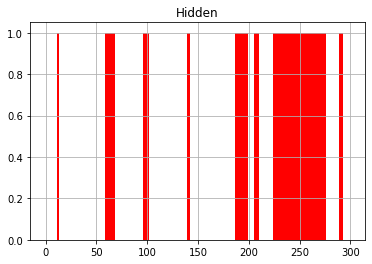

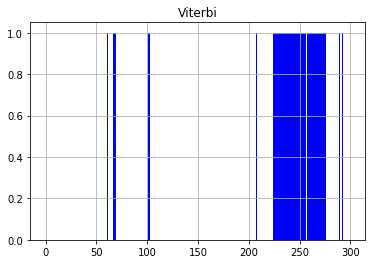

In [8]:
l = np.arange(L)
z1 = hidden
z2 = viterbi

fig = plt.figure()
plt.bar(l, z1, color = 'red')
plt.title('Hidden')
plt.grid(True)

fig = plt.figure()
plt.bar(l, z2, color = 'blue')
plt.title('Viterbi')
plt.grid(True) 

In [9]:
s0 = 0
s1 = 0
for i in range(V.shape[0]):
    s0 += V[i][0] + V[i][1] 
    print(s0)

0.14444444444444443
0.165037037037037
0.1680925308641975
0.16855786738683126
0.16862990335219477
0.16864130904671065
0.16864311494834233
0.16864340088276736
0.168643446155718
0.16864345332393518
0.1686434544589029
0.16864345463860614
0.16864345466705916
0.16864345467156422
0.1686434546722775
0.16864345467239045
0.16864345467240832
0.1686434546724115
0.16864345467241215
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.16864345467241224
0.168643

In [10]:
def forward(obs, states, pi, T, E):
    
    fwd = np.zeros((L+1, m))
    for j in range(m):
        fwd[0, j] = pi[j]

    
    for state in states:
        fwd[1, state] = pi[state]*E[state, obs[0]-1]
        
    for i in range(2, L+1):
        for state1 in states:
            for state2 in states:
                fwd[i, state1] += fwd[i-1, state2]*T[state2, state1]  
            fwd[i, state1] *= E[state1, obs[i-1]-1]
    return fwd

F = forward(observed, states, pi, T, E)
np.sum(F)

1.1701124410591237

In [11]:
def backward(obs, states, pi, T, E):

    bk = np.zeros((L+1, m))
    
    for j in range(m):
        bk[L, j] = pi[j]
   
    for i in range(L-1,-1,-1):
        for state1 in states:
            for state2 in states:
                bk[i, state1] += bk[i+1, state2]*T[state1, state2]
                
            bk[i, state1] *= E[state1, obs[i-1]-1]
    return bk

B = backward(observed, states, pi, T, E)
np.sum(B)

1.1708390915667073

In [12]:
for i in range(L+1):
    print(F[i][0]*B[i][0] + F[i][1]*B[i][1])

1.4863753158415815e-224
1.5111789658095654e-224
1.5249824411828466e-224
1.5326602633628532e-224
1.5369237573978582e-224
1.539278521867674e-224
1.5405561118331123e-224
1.5412076919074575e-224
1.541463359289513e-224
1.5414133996567458e-224
1.5410401704015852e-224
1.5402118703694138e-224
1.538635995960636e-224
1.5357560472124658e-224
1.530555006929716e-224
1.5211961940243017e-224
1.5043746629976633e-224
1.4741501045598065e-224
2.217978874592473e-224
2.2179662061023356e-224
1.474160808191964e-224
1.504391368683309e-224
1.5212188534314878e-224
1.5305856742073751e-224
1.5357996043869275e-224
1.5387018769610023e-224
1.5403173924993853e-224
1.5412166497245528e-224
1.5417172098644518e-224
1.5419958393527987e-224
1.5421509326422433e-224
1.542237258951274e-224
1.5422853033156877e-224
1.5423120319904464e-224
1.542326883866383e-224
1.542335103694194e-224
1.5423395942013097e-224
1.542341941153085e-224
1.5423429733456286e-224
1.5423430552845807e-224
1.5423422159056386e-224
1.5423401587928264e-224
1.5

In [13]:
# Апостериорная вероятность
PS = np.zeros((L, m))
for i in range(L):
    for j in range(m):
        PS[i, j] = F[i][j]*B[i][j]/sum(B[0])
for i in range(PS.shape[0]):
    print(np.sum(PS[i]))


0.6247433067026111
0.6351686105502592
0.6409703947677327
0.6441974855071237
0.645989488733461
0.6469792275468679
0.6475162155949814
0.6477900833630273
0.6478975437628193
0.6478765450649508
0.6477196718469002
0.6473715263310768
0.646709165365717
0.6454986846177592
0.643312618238758
0.6393789847485993
0.632308671614778
0.6196048878659193
0.9322460091614724
0.9322406844266393
0.6196093867448206
0.632315693236558
0.6393885087986979
0.6433255081032815
0.6455169922772809
0.646736856026063
0.6474158786852273
0.6477938484526472
0.6480042405344256
0.6481213522127747
0.6481865399843033
0.6482228240797027
0.6482430177648187
0.6482542521821792
0.648260494623092
0.6482639495260041
0.6482658369458464
0.6482668234008805
0.6482672572451295
0.6482672916851605
0.6482669388830316
0.6482660742511672
0.6482643924558442
0.6482612995924795
0.6482557034557939
0.6482456278414406
0.6482275146746255
0.6481949675213415
0.6481364927692236
0.6480314408048274
0.6478427138658243
0.6475036654390484
0.646894564893789
0